# K Means Cluster Algorithm 

**K-Means Clustering is an unsupervised machine learning algorithm used to group data into K number of clusters based on feature similarity**

**The algorithm aims to partition n data points into k clusters where each data point belongs to the cluster with the nearest mean (centroid).**

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Scatter plot for data visualisation 

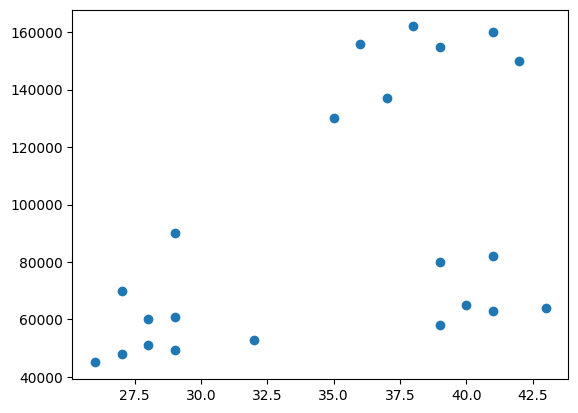

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3) ## we need to specify the cluster number 
km ## it creates the kmeans object for us 

KMeans(n_clusters=3)

#### now lets fit and predict to get the cluster 

In [5]:
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
y_predicted 

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
## append the cluster to the data frame 
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


**for better visualisation now lets plot this as scatter plot**

In [7]:
# to find the centroid 
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

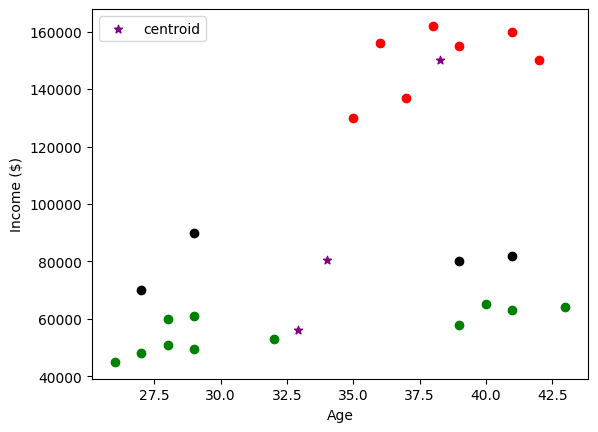

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#### for proper scaling we use min max scaler 

## Preprocessing using Min Max Scaller 

**Min-Max Scaler is a normalization technique used to scale data into a fixed range — usually [0, 1].**

**It transforms features by scaling each feature to a given range, which helps machine learning models train more efficiently (especially algorithms that use distance metrics like K-Means, KNN, SVM, etc.).**


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])

df['Income($)'] = scaler.transform(df[['Income($)']])

-  df[['Income($)']] selects the Income column as a 2D array (required by sklearn).

-  scaler.fit(...) calculates the min and max of the column to prepare for scaling.

- scaler.transform(...) scales the values to a range (usually [0, 1]).

- You overwrite the original Income($) column with the scaled values.

In [11]:
df.head() ## both age and income got scaled 

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


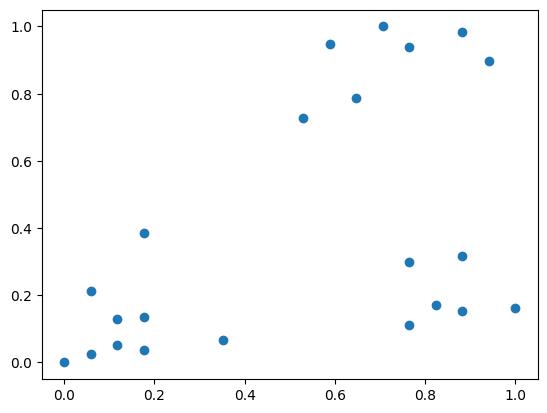

In [14]:
plt.scatter(df.Age,df['Income($)'])

**prediction to get cluster** 

In [12]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted 

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [15]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


#### to get the centroids 

In [16]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

### plotting the graph 

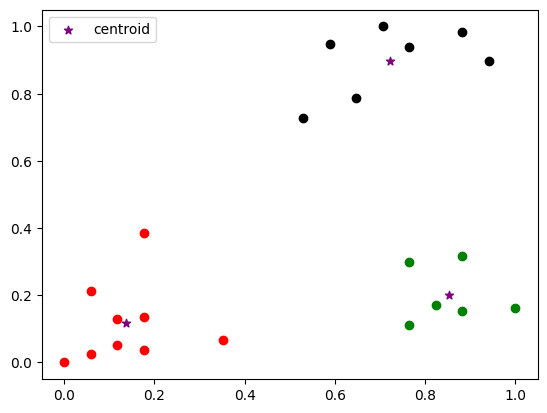

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot

In [20]:
sse = [] ## sse is the sum of squared error 

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [21]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.39237665288019463,
 0.36646943372537094,
 0.21878010893330452,
 0.22601378661067245,
 0.1767361429710231,
 0.12471684700746011]

**now lets plot the elbow graph**

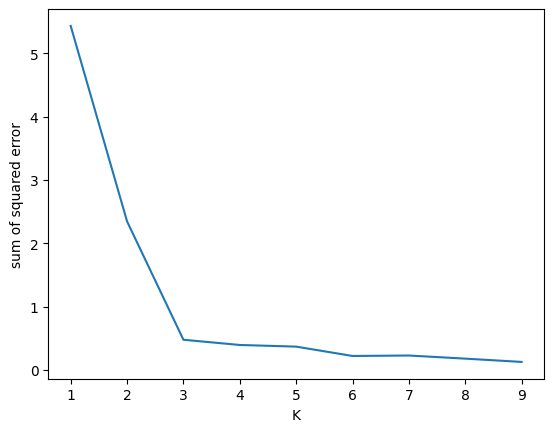

In [22]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(range(1,10),sse)